# Data Cleaning

### 🙈 Suppress warnings

In [1]:
import warnings

warnings.simplefilter(action='ignore')

### 🪡 Merge raw_data files into one dataframe

In [2]:
import pandas as pd

raw_data_files = [pd.read_csv('raw_data/cellphoneS.csv'),
                  pd.read_csv('raw_data/hoangHa1.csv'),
                  pd.read_csv('raw_data/hoangHa2.csv'),
                  pd.read_csv('raw_data/nguyenkim.csv'),
                  pd.read_csv('raw_data/thegioididong.csv')]

data = pd.concat(raw_data_files, ignore_index=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1831 non-null   int64 
 1   Name               1831 non-null   object
 2   Screen size        1082 non-null   object
 3   Screen type        1603 non-null   object
 4   Rear camera        562 non-null    object
 5   Front camera       565 non-null    object
 6   Chip               1557 non-null   object
 7   RAM                1672 non-null   object
 8   ROM                1663 non-null   object
 9   Batery             1456 non-null   object
 10  SIM                1357 non-null   object
 11  OS                 1527 non-null   object
 12  Screen resolution  1484 non-null   object
 13  Screen feature     188 non-null    object
 14  CPU type           222 non-null    object
 15  Weight             245 non-null    object
 16  Bluetooth          258 non-null    object


<AxesSubplot:>

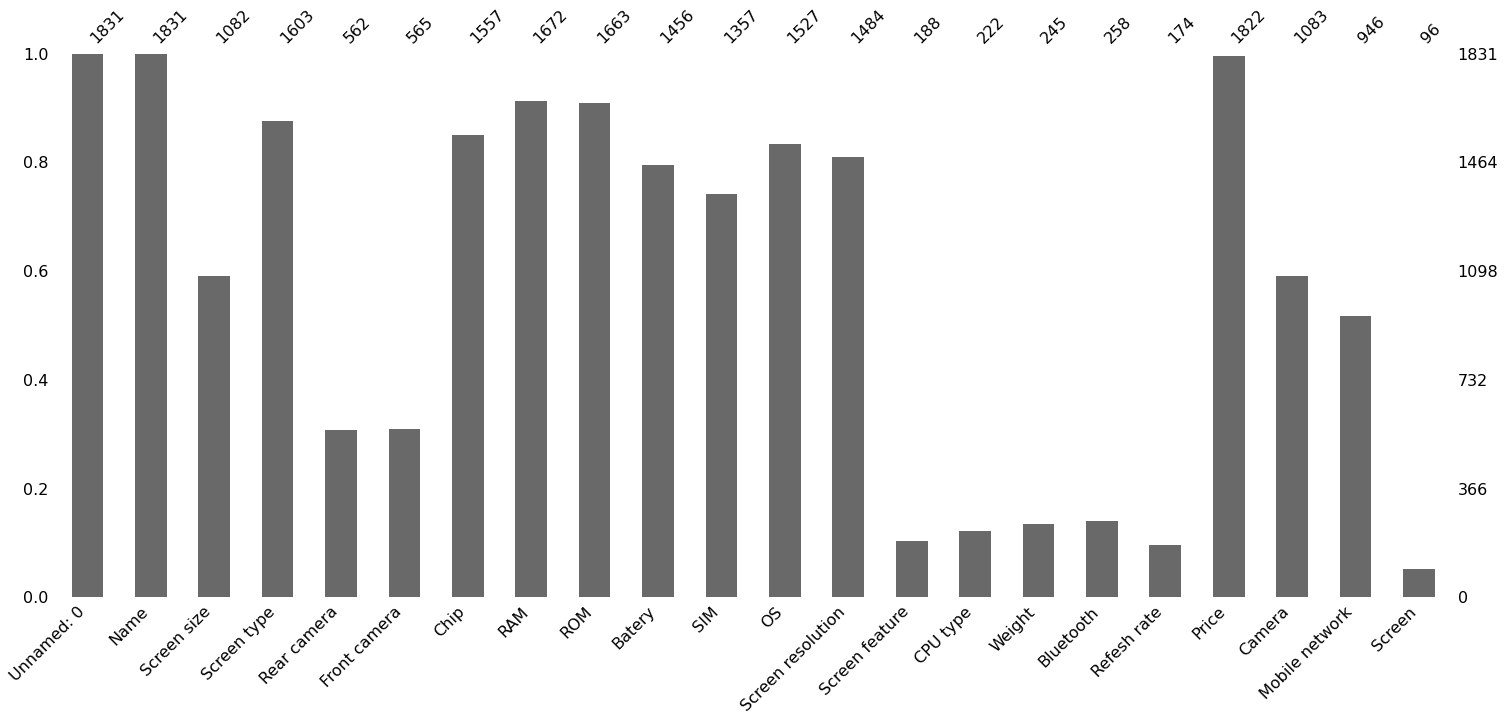

In [3]:
import missingno as msno

msno.bar(data)

### 🚫 Remove rows with ***'Mobile network'*** has ***'2G'***

🔖 Use only smart phone data

In [4]:
def clean_2G(data, column):
    data.drop(data[data[column].str.contains("2G") == True].index, inplace = True)
    
    return data

data = clean_2G(data, 'Mobile network')

### 🚫 Remove rows with ***'Name'*** has ***'XOR'***

🔖 Use only phone data whose price depends on its specifications

In [5]:
def clean_XOR(data, column):
    data.drop(data[data[column].str.contains("XOR") == True].index, inplace = True)

    return data

data = clean_XOR(data, 'Name')

### ✂️ Drop the unnecessary columns

In [6]:
data.drop(['Unnamed: 0', 'Name', 'SIM', 'Weight'], axis=1, inplace=True)

### 👀 Check missing values

In [7]:
data.isnull().sum()

Screen size           645
Screen type           228
Rear camera          1117
Front camera         1114
Chip                  122
RAM                    55
ROM                    64
Batery                271
OS                    256
Screen resolution     243
Screen feature       1491
CPU type             1457
Bluetooth            1421
Refesh rate          1505
Price                   9
Camera                644
Mobile network        781
Screen               1583
dtype: int64

### 🚫 Remove rows with ***'Price'*** is ***'NaN'***

🔖 ***'Price'*** is the target feature

In [8]:
data = data[data['Price'].notnull()]

### ✂️ Drop columns with more than 1100 missing values

🔖 Missing value size is 60% larger than the size of the dataset

In [9]:
data.drop(['Rear camera', 'Front camera', 'Screen feature', 'CPU type', 'Bluetooth', 'Refesh rate', 'Screen'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 0 to 1828
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Screen size        1034 non-null   object
 1   Screen type        1451 non-null   object
 2   Chip               1548 non-null   object
 3   RAM                1615 non-null   object
 4   ROM                1606 non-null   object
 5   Batery             1404 non-null   object
 6   OS                 1414 non-null   object
 7   Screen resolution  1436 non-null   object
 8   Price              1670 non-null   object
 9   Camera             1035 non-null   object
 10  Mobile network     898 non-null    object
dtypes: object(11)
memory usage: 156.6+ KB


# Data type

### 🧹 ['Screen size']

In [10]:
data['Screen size'].unique()

array(['6.7 inches', '6.1 inches', '6.43 inches', '6.8 inches',
       '6.67 inches', '6.6 inches', '6.9 inches', '6.55 inches',
       '6.58 inches', '4.7 inches', '6.39 inches', '6.4 inches',
       '6.78 inches', '6.28 inches', '6.5 inches', '5.4 inches',
       '6.53 inches', '6.73 inches', '6.71 inches', '6.51 inches',
       '7.6 inches', '6.59 inches', nan, '6.44 inches', '6.82 inches',
       '6.52 inches', '6.49 inches', '6.56 inches', '6.81 inches',
       '6.22 inches', 'Chính: 7.6 inches & Phụ: 6.23 inches',
       '5.5 inches', '2.4 inches', '5.8 inches', '6.26 inches',
       '6.47 inches', '6.2 inches', '5.6 inches',
       '6.7" - Tần số quét 120 Hz', '6.67"', '6.1"', '6.6"',
       '6.8", Tần số quét: 1 - 120 Hz', '6.4"',
       '6.43" - Tần số quét 90 Hz', '6.67" - Tần số quét 120 Hz',
       '6.5" - Tần số quét 60 Hz', '6.52 inch, màn hình giọt nước',
       '5.4"', '6.8"', '6.43"', '2.4 inch', '6.5"',
       '6.4" - Tần số quét 120 Hz', '6.52"', '6.67”',
       '6.5

In [11]:
import re

def filter_screen_size(string):
    string = str(string)
    string = string.strip()

    # if string is empty, return NaN
    if string == '':
        return None

    # replace all commas with dots
    string = string.replace(',', '.')

    # remove all inch characters
    string = string.replace('"', '')

    # find all string with format 'x.x'
    matched_values = re.findall('\d+\.\d+', string)

    # convert the first matched value to float
    if len(matched_values) > 0:
        return float(matched_values[0])

    return None

data['Screen size'] = data['Screen size'].apply(filter_screen_size)

data['Screen size'].unique()

array([6.7 , 6.1 , 6.43, 6.8 , 6.67, 6.6 , 6.9 , 6.55, 6.58, 4.7 , 6.39,
       6.4 , 6.78, 6.28, 6.5 , 5.4 , 6.53, 6.73, 6.71, 6.51, 7.6 , 6.59,
        nan, 6.44, 6.82, 6.52, 6.49, 6.56, 6.81, 6.22, 5.5 , 2.4 , 5.8 ,
       6.26, 6.47, 6.2 , 5.6 , 1.77])

### 🧹 ['Screen type']

In [12]:
data['Screen type'].unique()

array(['Super AMOLED', 'IPS LCD', 'OLED', 'AMOLED', 'Dynamic AMOLED 2X',
       'Dynamic AMOLED', 'Liquid Retina', nan, 'TFT LCD', 'PLS TFT LCD',
       'Super AMOLED Plus', 'Dynamic AMOLED 2X, 10 - 120 Hz, Infinity O',
       'AMOLED 90Hz', 'LCD, 16 triệu màu', 'PLS LCD',
       'IPS LCD, 6.52", HD+ 720 x 1600 pixels',
       'Thiết kế hiện đại màn hình lỗ',
       '720 x 1600 pixels, 20:9 ratio (~269 ppi density)',
       '120Hz Ultra Smooth Display, 240Hz Touch sampling rate; 2412*1080',
       'QQVGA, Màu màn hình: 262K', 'QQVGA, Màu: 262K', 'QVGA', 'QQVGA',
       'IPS LCD, 90Hz',
       'AMOLED, 1 tỷ màu, HDR10+, 120Hz, tỷ lệ 20:9, 6.28 inches, Full HD+ (1080 x 2400 pixels), Corning Gorilla Glass Victus, Cảm biến vân tay trong màn hình, Cảm ứng điện dung đa điểm',
       'LTPO AMOLED, 120Hz, HDR10+', 'LCD', 'Đang cập nhật',
       '20:9 màn hình giọt nước | Tốc độ làm tươi màn hình 90Hz',
       'Super Retina XDR', 'Liquid Retina, IPS LCD',
       'Liquid Retina HD display',
    

In [13]:
def filter_screen_type(string):
    string = str(string)
    
    # get all types of screen
    screen_types = ['OLED', 'LCD']
    
    if string in screen_types:
        return string

    # convert string to one of the screen types
    for screen_type in screen_types:
        if screen_type in string:
            return screen_type

    return None

data['Screen type'] = data['Screen type'].apply(filter_screen_type)

data['Screen type'].value_counts()

OLED    790
LCD     512
Name: Screen type, dtype: int64

### 🧹 ['Chip']

In [14]:
data['Chip'].unique()

array(['Snapdragon 778G 5G 8 nhân', 'A13 Bionic', 'Apple A15',
       'Snapdragon 680 8 nhân', 'Apple A14 Bionic (5 nm)',
       'Qualcomm Snapdragon 8 Gen 1 (4 nm)',
       'MediaTek Dimensity 920 5G (6 nm)', 'Snapdragon 8 Gen 1',
       'MediaTek Dimensity 1200-Ultra', 'Exynos 990 (7 nm+)',
       'Snapdragon 695 5G 8 nhân', 'MediaTek Helio G25 (12 nm)',
       'Snapdragon 780G (5 nm)', 'Snapdragon 680', 'MediaTek Helio G96',
       'MediaTek Dimensity 800U 5G 8 nhân', 'Chip A15 Bionic 6 nhân',
       'Snapdragon 730 8 nhân', 'MediaTek Helio G85 (12nm)',
       'MediaTek Dimensity 900', 'Snapdragon 888 Plus 8 nhân',
       'Snapdragon 8 Gen 1 8 nhân', 'Snapdragon 888 (5 nm)',
       'Exynos 850 8 nhân', 'Qualcomm® Snapdragon™ 662',
       'Qualcomm® Snapdragon® 888+ 5G Mobile Platform', 'UNISOC T606',
       'Mediatek Helio G80 (12 nm)', 'Qualcomm® Snapdragon™ 888+ 5G',
       'Snapdragon 888 8 (5nm)', 'MT6877 Dimensity 900 5G (6 nm)',
       'Exynos 1280 8 nhân', 'Exynos 2100 (5nm)'

In [15]:
def filter_chip(string):
    string = str(string)

    # find all string with format 'Ax'
    chip_apple_values = re.findall('A\d+', string)

    # convert the first matched value to 'Apple'
    if len(chip_apple_values) > 0:
        string = 'Apple'

    # convert all to lower case
    string = string.lower()

    # get all types of chip
    chip_types = ['snapdragon', 'apple', 'mediatek', 'exynos']

    if string in chip_types:
        return string

    # convert string to one of the chip types
    for chip_type in chip_types:
        if chip_type in string:
            return chip_type

    return None

data['Chip'] = data['Chip'].apply(filter_chip)

data['Chip'].value_counts()

snapdragon    460
mediatek      373
apple         368
exynos        108
Name: Chip, dtype: int64

### 🧹 ['RAM'] - ['ROM']

In [16]:
data['RAM'].unique()

array(['8 GB', '4 GB', '6 GB', '12 GB', '4GB + Mở rộng 3GB',
       '4GB + Mở rộng 1GB', '16 GB', '2 GB', '3 GB', '6GB + Mở rộng 5GB',
       nan, '12 GB + 3 GB (RAM bổ sung)', '8GB', '12GB', '3GB',
       '8 GB, công nghệ mở rộng Ram 3G', '16MB', '4GB', '48MB',
       '4 GB ~ 7GB ( Bao gồm cả RAM ảo)', '64 MB', '48 MB', '16 MB',
       '6GB', 'Không', 'Đang cập nhật', '2 GB DDR3 DRAM',
       '8 GB + 3 GB (Công nghệ mở rộng RAM)', 'FM không cần tai nghe'],
      dtype=object)

In [17]:
data['ROM'].unique()

array(['256 GB', '64 GB', '128 GB', '512 GB', '32 GB', '16 GB', '1 TB',
       '128 MB', '4 GB', '128GB', '256GB', '512GB', '32GB', nan, '24MB',
       '64GB', '128MB', '256MB', '24 MB', 'Không',
       '32 GB e-MMC 5.1, hỗ trợ thẻ nhớ ngoài 64GB', '1TB', '3.5 mm'],
      dtype=object)

In [18]:
def filter_ram_rom(string):
    string = str(string)
    
    # remove all spaces
    string = string.replace(' ', '')

    # find all string with format 'xGB' or 'xMB' or 'xTB
    regex = re.compile('\d+GB|\d+MB|\d+TB')
    number = regex.findall(string)

    # convert TB, GB to MB and convert to int
    if len(number) > 0:
        if 'TB' in number[0]:
            return int(number[0].replace('TB', '')) * 1024 * 1024
        elif 'GB' in number[0]:
            return int(number[0].replace('GB', '')) * 1024
        elif 'MB' in number[0]:
            return int(number[0].replace('MB', ''))

    return None

data['RAM'] = data['RAM'].apply(filter_ram_rom)
data['ROM'] = data['ROM'].apply(filter_ram_rom)

In [19]:
data['RAM'].unique()

array([8.1920e+03, 4.0960e+03, 6.1440e+03, 1.2288e+04, 1.6384e+04,
       2.0480e+03, 3.0720e+03,        nan, 1.6000e+01, 4.8000e+01,
       6.4000e+01])

In [20]:
data['ROM'].unique()

array([2.621440e+05, 6.553600e+04, 1.310720e+05, 5.242880e+05,
       3.276800e+04, 1.638400e+04, 1.048576e+06, 1.280000e+02,
       4.096000e+03,          nan, 2.400000e+01, 2.560000e+02])

### 🧹 ['Battery']

In [21]:
data['Batery'].unique()

array(['5000 mAh', '3110 mAh', '4,325mAh', 'Li-Po 5000 mAh',
       'Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0',
       'Li-Ion 5000 mAh', 'Li-Po 4500 mAh', '4500 mAh',
       'Non-removable Li-Ion 4500 mAh battery Fast charging 25W USB Power Delivery 3.0 Fast Qi/PMA wireless charging Reverse wireless charging 9W',
       'Khoảng 3.200mAh', '4,500 mAh', '6000 mAh', 'Li-Po 4250 mAh',
       '5000mAh (typ)', '4310mAh (Typ)', '1.820mAh',
       '4,000mAh, sạc nhanh Quick Charge 3.0 18W', 'Li-Po 7000 mAh',
       '3,095mAh', '4500mAh', '5000mAh', 'Li-Po 5050 mAh', '3300 mAh',
       'Li-P0 4300 mAh', 'Li-Po 5000 mAh battery, Hỗ trợ sạc nhanh 10W',
       'Li-Po 4200 mAh', '4600 mAh',
       '4x2.4 GHz Kryo 265 Gold & 4x1.9 GHz Kryo 265 Silver', '5.000 mAh',
       'Li-Po 4400 mAh',
       'Dung lượng pin 5,000mAhSạc nhanh có dây 25WSạc nhanh không dây 15WSạc ngược không dây 4.5W',
       'Li-Po 4500 mAh, sạc nhanh 25W, sạc không dây cho các thiết bị ngoại vi 5.4W',
 

In [22]:
def filter_battery(string):
    string = str(string)
    
    # remove all spaces
    string = string.replace(' ', '')

    # remove all commas
    string = string.replace(',', '')

    # remove all dots
    string = string.replace('.', '')

    # find all string with format 'xmAh'
    regex = re.compile('\d+mAh')
    number = regex.findall(string)

    # get the first number and convert to int
    if len(number) > 0:
        return int(number[0].replace('mAh', ''))
    
    return None

data['Batery'] = data['Batery'].apply(filter_battery)

data['Batery'].unique()

array([5000., 3110., 4325.,   nan, 4500., 3200., 6000., 4250., 4310.,
       1820., 4000., 7000., 3095., 5050., 3300., 4300., 4200., 4600.,
       4400., 2942., 2406., 5160., 5020., 4800., 3700., 4050., 2950.,
       4230., 4450., 2691., 4020., 4100., 1150., 1500., 3046., 3750.,
       1821., 3500., 2900., 1750., 3000., 4470., 2815., 2227., 1700.,
       4520., 1000., 1400., 1900., 2000., 4352., 3240., 2438., 2018.])

### 🧹 ['OS']

In [23]:
data['OS'].unique()

array(['Android 12, One UI 4.1',
       'iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)', 'iOS15',
       'Android 11, MIUI 12.5',
       'iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)',
       'Android 12', 'Android 10, One UI 2.1', 'iOS 15',
       'Android 11 - ColorOS 12', 'Android 11, HIOS 7.6',
       'Android 11, MIUI 12', 'Android 12, FunTouchOS 12',
       'ColorOS 11.3, nền tảng Android 11', 'Android 10, VOS 3.0',
       'Android 11, ColorOS 12', 'Android 11, ROG UI',
       'Android 12, MIUI 13', 'ColorOS 11.1, Android 11', 'Android 11',
       'Android 11 (Go edition), HiOS 7.6', 'Android 11, One UI 3.0',
       'Android 11, RedMagic OS 4.0', 'Android 11, ColorOS 11.3',
       'Android 12, One UI 4', nan, 'Android 11, One UI 3.1',
       'Android 10, MIUI 12', 'Android 11, Redmagic 4.0', 'MIUI 12.5',
       'Android 11, MIUI 13', 'Android 11, Funtouch 11',
       'One UI 3.1,  Android 11', 'Android 10, One UI 2.5',
       'MIUI 13, Android 11',
       'Android 11, 

In [24]:
def filter_os(string):
    string = str(string)

    # covert all to lower case
    string = string.lower()
    
    # get all types of os
    os_types = ['android', 'ios']
    
    if string in os_types:
        return string

    for os_type in os_types:
        if os_type in string:
            return os_type

    return 'android'

data['OS'] = data['OS'].apply(filter_os)

data['OS'].value_counts()

android    1335
ios         335
Name: OS, dtype: int64

### 🧹 ['Screen resolution']

In [25]:
data['Screen resolution'].unique()

array(['1080 x 2400 pixels (FullHD+)', '1792 x 828 pixel',
       '2778 x 1284 pixel', nan, '1284 x 2778 pixels',
       '1440 x 3088 pixels (QHD+)', '1080 x 2340 pixels (FullHD+)',
       '2532 x 1170 pixels', '1170 x 2532 pixels', '720 x 1640 pixels',
       '1080 x 2408 pixels', '1334 x 750 pixels (HD+)',
       '1080 x 1620 pixels (FullHD+)', '1080 x 2448 pixels (FullHD+)',
       '720 x 1612 (HD+)', '720 x 1600 pixel',
       '1440 x 3200 pixels (QHD+)', '1600 x 720 pixels (HD+)',
       '720 x 1560 pixes', '3200 x 1440 pixel', '2412 x 1080 pixels',
       '750 x 1560 pixel', '1080 x 2280 pixels (FullHD+)',
       '720 x 1520 pixels', '1080 x 2376 pixels (FullHD+)',
       'Chính: 1768 x 2208 pixels & Phụ: 816 x 2260 pixels',
       '1080 x 1920 pixels (FullHD)', '1440 x 3216 pixels (QHD+)',
       '2408 x 1080 pixels', '1440 x 2960 pixels (QHD+)',
       '3168 x 1440 pixel', '1080 x 2160 pixels (FullHD+)',
       '240 x 320 pixels', '2436 x 1125 pixels',
       '1920 x 1080 pixel

In [26]:
def filter_screen_resolution(string):
    string = str(string)

    # remove all spaces
    string = string.replace(' ', '')

    # find all string with format 'axb'
    regex = re.compile('\d+x\d+')
    number = regex.findall(string)

    # multiply the first number by the second number and convert to int
    if len(number) > 0:
        return int(number[0].split('x')[0]) * int(number[0].split('x')[1])

    return None

data['Screen resolution'] = data['Screen resolution'].apply(filter_screen_resolution)

data['Screen resolution'].unique()

array([2592000., 1483776., 3566952.,      nan, 4446720., 2527200.,
       2962440., 1180800., 2600640., 1000500., 1749600., 2643840.,
       1160640., 1152000., 4608000., 1123200., 2604960., 1170000.,
       2462400., 1094400., 2566080., 3903744., 2073600., 4631040.,
       4262400., 4561920., 2332800.,   76800., 2740500., 2397600.,
       2851200., 1120000.,   20480.,   38720.,  921600.])

### 🧹 ['Camera']

In [27]:
data['Camera'].unique()

array([nan, 'Chính 108 MP & Phụ 12 MP, 5 MP, 5 MP, 32 MP',
       'Chính 108 MP & Phụ 8 MP, 5 MP, 2 MP, 16 MP',
       '2 camera 12 MP, 10 MP',
       '12MP (UW) + 50MP (W) + 10MP (Tele), 10MP',
       '12MP (UW) + 108MP (W) + 12MP (Tele3x) + 12MP (Tele10x), 40MP',
       '3 camera 12 MP, 10 MP & 4 MP',
       'Chính 64 MP & Phụ 8 MP, 5MP, 5MP, 20 MP', '2 camera 12 MP, 12 MP',
       '3 camera 12 MP, 12 MP', '13 MP, 13 MP',
       'Chính 50  MP & Phụ 8 MP, 2 MP, 2 MP, 13 MP',
       'Chính 108 MP & Phụ 8 MP, 2 MP, 2 MP, 16 MP',
       'Chính 108 MP & Phụ 8 MP, 2 MP, 16 MP',
       'Camera góc rộng: 50 MP, f/1.8, PDAF, Camera góc siêu rộng: 8 MP, Camera Macro: 2MP f/2.4, Camera chân dung: 2MP, 13 MP, f/2.5',
       'Chính 50 MP & Phụ 2 MP, 2 MP, 16 MP',
       'Chính 48 MP & Phụ 2 MP, 2 MP, 16 MP',
       '13 MP (chính) + 2 MP (mono) + 2 MP (marco), F/2.2 + F/2.4 + F/2.4, 8 MP, F/2.0',
       '5 MP, 5 MP', 'Chính 108 MP & Phụ 12 MP, 10 MP, 10 MP, 40 MP',
       'Chính 64 MP & Phụ 8 MP, 

In [28]:
def filter_camera_count(string):
    string = str(string)

    # count the number of 'MP' in the string
    return string.count('MP')

data['Camera count'] = data['Camera'].apply(filter_camera_count)

data['Camera count'].unique()

array([0, 5, 2, 4, 3, 1], dtype=int64)

In [29]:
def filter_camera_max_mp(string):
    string = str(string)

    # remove all spaces
    string = string.replace(' ', '')

    # find all string with format 'xMP'
    regex = re.compile('\d+MP')
    matched_values = regex.findall(string)

    # remove 'MP' from matched values, convert to int and return the max number
    if len(matched_values) > 0:
        return max(map(lambda x: int(x.replace('MP', '')), matched_values))

    return None

data['Camera max MP'] = data['Camera'].apply(filter_camera_max_mp)

data['Camera max MP'].unique()

array([ nan, 108.,  12.,  50.,  64.,  13.,  48.,   5.,  32.,  16.,   8.,
         3.])

In [30]:
# drop the column 'Camera'
data.drop(columns=['Camera'], inplace=True)

### 🧹 ['Mobile network']

In [31]:
data['Mobile network'].unique()

array([nan, 'Hỗ trợ 4G', 'Hỗ trợ 5G', '5G', '4GB', '4G',
       '"GSM: 900/1800MHz  WCMA: 900/2100MHz, 4G-LTE: B1/3/7/ 8/20"',
       '1, 2, 3, 4, 5, 7, 8, 12, 17, 18, 19, 26, 34, 38, 39, 40, 41, 42',
       'Hỗ trợ 4G VoLTE',
       'Tốc độ mạng, GSM: 850, 900, 1800, 1900, WCDMA: 1, 5, 8, LTE FDD: 1, 3, 5, 7, 8, 20, 28, 38, 40, 41 (full), LTE CAT4'],
      dtype=object)

In [32]:
def filter_mobile_network(string):
    string = str(string)

    # find all string with format 'xG'
    regex = re.compile('\d+G')
    matched_values = regex.findall(string)

    # return the first matched value and remove 'G'
    if len(matched_values) > 0:
        return int(matched_values[0].replace('G', ''))

    return None

data['Mobile network'] = data['Mobile network'].apply(filter_mobile_network)

data['Mobile network'].value_counts()

4.0    466
5.0    416
Name: Mobile network, dtype: int64

### 🧹 ['Price']

In [33]:
data['Price'].unique()

array(['10.190.000\xa0₫', '11.490.000\xa0₫', '29.790.000\xa0₫',
       '4.490.000\xa0₫', '27.000.000\xa0₫', '29.190.000\xa0₫',
       '9.200.000\xa0₫', '24.490.000\xa0₫', '9.900.000\xa0₫',
       '18.990.000\xa0₫', '21.450.000\xa0₫', '15.990.000\xa0₫',
       '9.390.000\xa0₫', '2.649.000\xa0₫', '13.500.000\xa0₫',
       '7.490.000\xa0₫', '4.350.000\xa0₫', '6.990.000\xa0₫',
       '11.390.000\xa0₫', '3.990.000\xa0₫', '3.450.000\xa0₫',
       '4.790.000\xa0₫', '27.500.000\xa0₫', '20.490.000\xa0₫',
       '3.890.000\xa0₫', '6.090.000\xa0₫', '2.650.000\xa0₫',
       '17.990.000\xa0₫', '5.650.000\xa0₫', '32.190.000\xa0₫',
       '16.490.000\xa0₫', '18.790.000\xa0₫', '10.390.000\xa0₫',
       '8.350.000\xa0₫', '11.290.000\xa0₫', '15.000.000\xa0₫',
       '7.850.000\xa0₫', '8.500.000\xa0₫', '2.200.000\xa0₫',
       '9.990.000\xa0₫', '3.650.000\xa0₫', '22.390.000\xa0₫',
       '15.790.000\xa0₫', '6.590.000\xa0₫', '3.850.000\xa0₫',
       '3.350.000\xa0₫', '3.150.000\xa0₫', '4.950.000\xa0₫',
  

In [34]:
def filter_price(string):
    string = str(string)
    string = string.strip()

    string = string.replace('.', '')
    string = string.replace(',', '')
    string = string.replace('000\xa0₫', '')
    string = string.replace('000₫', '')
    string = string.replace('000đ', '')
    string = string.replace('000 ₫', '')
    string = string.replace('000 *', '')
    string = string.replace(' *', '')

    return int(string)

data['Price'] = data['Price'].apply(filter_price)

data['Price'].sort_values

<bound method Series.sort_values of 0       10190
1       11490
2       29790
3        4490
4       27000
        ...  
1817     2290
1818     1990
1819     1990
1826      650
1828      550
Name: Price, Length: 1670, dtype: int64>

### 🔖 Data after converting to the correct data type

In [35]:
data

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Price,Mobile network,Camera count,Camera max MP
0,6.70,OLED,snapdragon,8192.0,262144.0,5000.0,android,2592000.0,10190,NaN,0,NaN
1,6.10,LCD,apple,4096.0,65536.0,3110.0,ios,1483776.0,11490,NaN,0,NaN
2,6.70,OLED,apple,6144.0,131072.0,4325.0,ios,3566952.0,29790,NaN,0,NaN
3,6.43,OLED,snapdragon,4096.0,65536.0,5000.0,android,NaN,4490,NaN,0,NaN
4,6.70,OLED,apple,6144.0,131072.0,NaN,ios,3566952.0,27000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,NaN,None,None,3072.0,32768.0,4000.0,android,NaN,2290,NaN,0,NaN
1818,NaN,None,None,2048.0,32768.0,3000.0,android,NaN,1990,NaN,0,NaN
1819,NaN,None,None,2048.0,32768.0,2950.0,android,NaN,1990,NaN,0,NaN
1826,NaN,None,None,NaN,NaN,NaN,android,NaN,650,NaN,0,NaN


### 🚫 Fill missing values

In [36]:
data.isnull().sum()

Screen size          644
Screen type          368
Chip                 361
RAM                   73
ROM                   74
Batery               294
OS                     0
Screen resolution    344
Price                  0
Mobile network       788
Camera count           0
Camera max MP        659
dtype: int64

##### Mean inputation

In [37]:
def mean_imputation(data, column):
  data[column] = data[column].fillna(data[column].mean())
  return data

mean_imputation(data, 'Screen size')
mean_imputation(data, 'RAM')
mean_imputation(data, 'ROM')
mean_imputation(data, 'Batery')
mean_imputation(data, 'Screen resolution')
mean_imputation(data, 'Camera max MP')

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Price,Mobile network,Camera count,Camera max MP
0,6.700000,OLED,snapdragon,8192.000000,262144.000000,5000.000000,android,2.592000e+06,10190,NaN,0,37.530168
1,6.100000,LCD,apple,4096.000000,65536.000000,3110.000000,ios,1.483776e+06,11490,NaN,0,37.530168
2,6.700000,OLED,apple,6144.000000,131072.000000,4325.000000,ios,3.566952e+06,29790,NaN,0,37.530168
3,6.430000,OLED,snapdragon,4096.000000,65536.000000,5000.000000,android,2.275550e+06,4490,NaN,0,37.530168
4,6.700000,OLED,apple,6144.000000,131072.000000,4401.634448,ios,3.566952e+06,27000,NaN,0,37.530168
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,6.133899,None,None,3072.000000,32768.000000,4000.000000,android,2.275550e+06,2290,NaN,0,37.530168
1818,6.133899,None,None,2048.000000,32768.000000,3000.000000,android,2.275550e+06,1990,NaN,0,37.530168
1819,6.133899,None,None,2048.000000,32768.000000,2950.000000,android,2.275550e+06,1990,NaN,0,37.530168
1826,6.133899,None,None,5882.149029,152752.761905,4401.634448,android,2.275550e+06,650,NaN,0,37.530168


##### Arbitrary imputation 

In [38]:
import numpy as np

def arbitrary_imputation(data, column, arbitrary_list):
    data[column] = data[column].fillna(arbitrary_list[np.random.randint(0, len(arbitrary_list))])
    return data

screen_type_list = data['Screen type'].dropna().unique().tolist()
arbitrary_imputation(data, 'Screen type', screen_type_list)

mobile_network_list = data['Mobile network'].dropna().unique().tolist()
arbitrary_imputation(data, 'Mobile network', mobile_network_list)

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Price,Mobile network,Camera count,Camera max MP
0,6.700000,OLED,snapdragon,8192.000000,262144.000000,5000.000000,android,2.592000e+06,10190,4.0,0,37.530168
1,6.100000,LCD,apple,4096.000000,65536.000000,3110.000000,ios,1.483776e+06,11490,4.0,0,37.530168
2,6.700000,OLED,apple,6144.000000,131072.000000,4325.000000,ios,3.566952e+06,29790,4.0,0,37.530168
3,6.430000,OLED,snapdragon,4096.000000,65536.000000,5000.000000,android,2.275550e+06,4490,4.0,0,37.530168
4,6.700000,OLED,apple,6144.000000,131072.000000,4401.634448,ios,3.566952e+06,27000,4.0,0,37.530168
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,6.133899,OLED,None,3072.000000,32768.000000,4000.000000,android,2.275550e+06,2290,4.0,0,37.530168
1818,6.133899,OLED,None,2048.000000,32768.000000,3000.000000,android,2.275550e+06,1990,4.0,0,37.530168
1819,6.133899,OLED,None,2048.000000,32768.000000,2950.000000,android,2.275550e+06,1990,4.0,0,37.530168
1826,6.133899,OLED,None,5882.149029,152752.761905,4401.634448,android,2.275550e+06,650,4.0,0,37.530168


##### If ***'OS'*** is ***'ios'***, then ***'Chip'*** is ***'apple'***

In [39]:
def chip_with_os_ios(data):
    data.loc[data['OS'] == 'ios', 'Chip'] = 'apple'

chip_with_os_ios(data)

chip_list = data['Chip'].dropna().unique().tolist()
chip_list = list(filter(lambda x: x != 'apple', chip_list))
arbitrary_imputation(data, 'Chip', chip_list)

,Screen size,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Price,Mobile network,Camera count,Camera max MP
0,6.700000,OLED,snapdragon,8192.000000,262144.000000,5000.000000,android,2.592000e+06,10190,4.0,0,37.530168
1,6.100000,LCD,apple,4096.000000,65536.000000,3110.000000,ios,1.483776e+06,11490,4.0,0,37.530168
2,6.700000,OLED,apple,6144.000000,131072.000000,4325.000000,ios,3.566952e+06,29790,4.0,0,37.530168
3,6.430000,OLED,snapdragon,4096.000000,65536.000000,5000.000000,android,2.275550e+06,4490,4.0,0,37.530168
4,6.700000,OLED,apple,6144.000000,131072.000000,4401.634448,ios,3.566952e+06,27000,4.0,0,37.530168
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,6.133899,OLED,exynos,3072.000000,32768.000000,4000.000000,android,2.275550e+06,2290,4.0,0,37.530168
1818,6.133899,OLED,exynos,2048.000000,32768.000000,3000.000000,android,2.275550e+06,1990,4.0,0,37.530168
1819,6.133899,OLED,exynos,2048.000000,32768.000000,2950.000000,android,2.275550e+06,1990,4.0,0,37.530168
1826,6.133899,OLED,exynos,5882.149029,152752.761905,4401.634448,android,2.275550e+06,650,4.0,0,37.530168


### 📝 Export data to csv

In [40]:
data.to_csv('clean_data/clean_data.csv', index=False)